# Design, concept and implementation of smart interactive scripts in scientific basic classes

[Peter Kersten](https://www.hshl.de/personen/prof-dr-ing-peter-kersten), Hamm-Lippstadt University of Applied Sciences   
[Katrin Temmen](https://www.uni-paderborn.de/person/30086/), University of Paderborn, College of Electrical Engineering


EDUCON 2020 – IEEE Global Engineering Education Conference   
Workshop W2A 
Porto, Portugal

27th April 2020

# Table of content
- Introduction and motivation
- Design, technology and implementation of the interactive scripts
- Pedagogy of the scripts in physics and electrical engineering classes
- Hands-on experience using typical examples
- Feedback session 
- Summary and conclusion

# Hands-on experience using typical examples*
- Numerical calculations
- Visualisation of parametric curves
- Interactive plots
- Visualisation of functions with two variables
- Symbolic computation
- Visualisation of vector fields   


_*Examples were taken from an educational book, see: references_

## Performing numerical calculations

**Example: Free fall with friction**   

We want to study the movement of a skydiver in the first $20\,\text{s}$ (variable `i`) and visualise the velocity in an $v$-$t$-diagramm. We consider a mass of the skydiver of $m=64\,\text{kg}$ (variable `m`), a coefficient of friction of $b=0,251\,\text{m}^{-1}$ (variable `b`) and an initial velocity of $v_0=0$ at $t_0=0$. The acceleration can be calculated with:

$|a|=g-\frac{b}{m}\cdot |v|^2$. 

We want to apply a numerical integration with the Euler method to solve the ordinary differential equation with a the given initial value $v_0=0$.


**Give it a try**
- Change the mass from $m=64\,\text{kg}$ to $m=80\,\text{kg}$, what is the value of the terminal velocity?
- Vary the number of steps (variable `steps`) and analyse the accuracy of the result


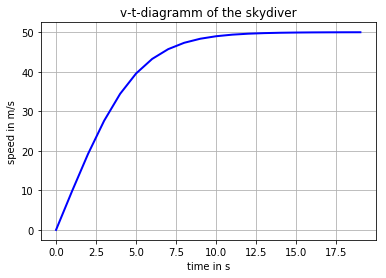

In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt

g = 9.81
m = 64
b = 0.251
i = 20
steps = 20
dt = i/steps

t = np.zeros(steps)
v = np.zeros(steps)
a = np.zeros(steps)

a[0] = g
for i in range (0,steps-1):
    t[i+1] = t[i] + dt
    v[i+1] = v[i] + a[i]*dt
    a[i+1] = g -b/m*v[i+1]**2
    
plt.plot(t,v,'b',lw=2)
plt.xlabel('time in s')
plt.ylabel('speed in m/s')
plt.title('v-t-diagramm of the skydiver')
plt.grid()

## Visualisation of parametric curves

**Example: Free fall with friction**   

Visualize the projectile motion of a mass with a given velocity at different throwing angles in a parametric diagramm. We consider an initial velocity of $v=24,5\,\text{m/s}$ (variable `v`). The motion in $x$- and $y$-direction is described with the following formulas:

$x(t)=x_0+v_{0,x}\,t$   
$y(t)=y_0+v_0\,t-\frac{1}{2}\,g\,t^2$

with $v_{0,x}=|v_0|\,\text{cos}\,\theta_0$, $v_{0,y}=|v_0|\,\text{sin}\,\theta_0$ and the time $t$ (variable `t`). We consider $x_0=0$ and $y_0=0$.


**Give it a try**

- Vary the angle (variable `theta`) by moving the slider, when can we achieve a maximum range?

In [47]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

g = 9.81
t = np.arange (0,10,0.1)
v = 24.5

def f(theta):
    plt.ylim(0, 35)
    plt.xlim(0, 65)
    plt.xlabel('x in m')
    plt.ylabel('height in m')
    plt.title('projectile motion')
      
    
    vx = v*np.cos(np.deg2rad(theta))
    vy = v*np.sin(np.deg2rad(theta))
    x = vx*t
    y = (vy*t)-1/2*g*t**2
    plt.plot(x, y, 'r', linewidth=2)
    plt.grid()
    

In [3]:
interact(f, 
    theta = widgets.FloatSlider(value=45, min=0, max=90, step=5))

interactive(children=(FloatSlider(value=45.0, description='theta', max=90.0, step=5.0), Output()), _dom_classe…

<function __main__.f(theta)>

## Interactive plots

**Example: Discharge curve of a capacitor**   

Visualize the discharge of a capacitor. We consider a capacitor with $C=4,0\,\mu \text{F}$ and an initial voltage of $U=24\,\text{V}$ at $t=0$. The discharge of a capacitor vs the time $t$ is calculated with the formula:

$ I(t) = \frac{U_0}{R}\cdot e^{-t/(R\cdot C)\,\,\,}$  

with the current $ I(t)$, the resistivity $ R $ and the capacity $C$.


**Give it a try**

- Vary the resistivity (variable `R`) by moving the slider and analyse the discharge


In [49]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
U = 24 #Spannung in V
C = 4.0e-6 #Kapazität in F
def I(R):
    
    t = np.linspace(0, 2) #Zeit in s
    I = (U/R)*np.exp(-(t/1000)/(R*C))
    plt.ylim(0, 0.2)
    plt.xlabel('time in ms')
    plt.ylabel('current in A')
    plt.title('discharge curve of a capacitor')
    plt.plot(t, I, 'r', linewidth=3)
    plt.grid()


In [5]:
interact(I, 
    R = widgets.FloatSlider(value=200, min=100, max=400, step=10)) #R in Ohm

interactive(children=(FloatSlider(value=200.0, description='R', max=400.0, min=100.0, step=10.0), Output()), _…

<function __main__.I(R)>

## Visualisation of functions with two variables
**Example: Electrical Potential of two charges**  

We want to visualise the electric potential $\phi(x,y,0)$ of thwo charges $q_1$ and $q_2$ in the $x$-$y$-plane and to calculate the value of the electrical potential at the position $ x=0,04\,\text{m}$, $y=0\,\text{m}$. We consider, that both electrical charges $q_1$ and $q_2$ have a value of $=+5,0\,\text{nC}$, the positions of the charges are $(0,0)$ and $(8\,\text{cm},0)$. The electric potential (variable `P`) can be calculated with:

$\phi= \sum_{i}^{} \frac{1}{4\pi\epsilon_0}\,\frac{q_i}{r_i}$

**Give it a try**
- Calculate the potential $\phi$ at the position $ x=0$, $y=0,06\,\text{m}$

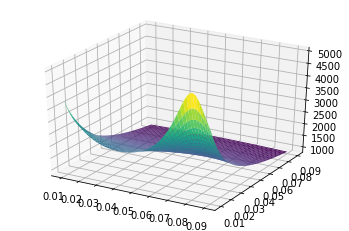

P in V = 2248.07528786154


In [45]:
from sympy import symbols
import sympy
from sympy.plotting import plot3d
import numpy as np

e0 = 8.854e-12
q1 = 5e-9
q2 = 5e-9

x, y = symbols('x y')
P1 = 1 / (4*3.14*e0)*q1 / sympy.sqrt(x**2 + y**2)
P2 = 1 / (4*3.14*e0)*q2 / sympy.sqrt((x-0.08)**2 + y**2)
P = P1 + P2
plot3d(P,(x,0.01,0.09),(y,0.01,0.09))

print('P in V =', P.subs(x, 0.04).subs(y, 0))


## Symbolic computation

**Example: Trajectory of a baseball**  

We want to calculate $v(t)$ by deriving the given function $r(t)$ of the baseball:

$r(t)=[1,5\,\text{m}+(12\,\text{m}\cdot \text{s})\,^{-1}\,t]\,\hat{x}+
[(16\,\text{m}\cdot \text{s}^{-1}\,t-(4,9\,\text{m}\cdot \text{s}^{-2})\,t^2]\,\hat{y}$


**Give it a try**
- Calculate $a(t)$ from $v(t)$ by adding the command `a = sy.diff(v,t)` to the code below


In [56]:
g = 9.81
r = sy.S("r")
t = sy.S("t")
r = np.array([1.5+12*t, 16*t-4.9*t**2])
v = sy.diff(r,t)
print(v)

[12, 16 - 9.8*t]


# Visualisation of vector fields
**Example: Electrical Field of two charges**  

We want to visualise the electric field $\vec{E}$ of thwo charges $q_1$ and $q_2$ in the $x$-$y$-plane. We consider, that electrical charges are $q_1=+1,0\,\text{nC}$ and $q_2=-1,0\,\text{nC}$, both charges are positioned on the $x$-axis at $x_1=+1,5\,\text{m}$ and $x_2=-1,5\,\text{m}$.

The electric field (variable `E`) can be calculated with:
$\vec{E}= \sum_{i}^{} \frac{1}{4\pi\epsilon_0}\,\frac{q_i}{r_i^2} \, \hat{r_i}$

**Give it a try**
- Change the the value for charge $q_1$ from $q_1=+1,0\,\text{nC}$ into $q_1=-1,0\,\text{nC}$ and analyse the electric field

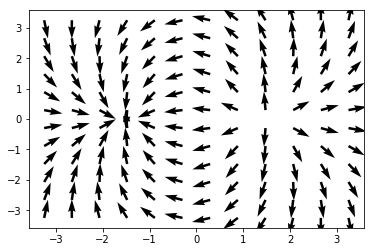

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import math


e0 = 8.854e-12
q1 = 1e-9
q2 = -1e-9
rx = np.linspace(-3.25,3.25,12);
ry = rx;

fig, ax = plt.subplots()

for i in range (0,12):
    for j in range (0,12):
        r1 = ([rx[i] - 1.5, ry[j]])
        E1 = 1/(4*math.pi*e0)*q1*(r1/np.linalg.norm(r1)**3)
        r2 = ([rx[i] + 1.5, ry[j]])
        E2 = 1/(4*math.pi*e0)*q2*(r2/np.linalg.norm(r2)**3)
        E = E1 + E2
        ax.quiver(rx[i], ry[j], E[0], E[1])
        
plt.show()
    
    

## Acknowledgment
This work is part of the program digitalization in higher education 2019 of the Donors' association for the promotion of humanities and sciences in Germany and the Ministry of Culture and Science of North Rhine-Westphalia and is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License (CC BY-SA 4.0)](https://creativecommons.org/licenses/by-sa/4.0/). 
    
<img align="left" src="https://licensebuttons.net/l/by-sa/3.0/88x31.png">

## References
Tipler, Paul A. and Mosca, Gene. Kersten, Peter and Wagner, Jenny (Eds.). _Physik für Studierende der Naturwissenschaften und Technik_. Springer-Verlag, 2019.